# Feuille 3

L'objectif de ce TP est de **calculer et tracer l'enveloppe convexe d'un nuage de points du plan**. L'algorithme de ce calcul utilise des piles.
Les notions utiles seront introduites au fur et à mesure.

-   Ce TP peut profiter d'une implémentation python du type de données abstrait *pile LIFO*.
-   Le travail demandé sera effectué dans ce notebook jupyter.
-   Dans le notebook, les *modules* demandés pourront être codés par des fonctions ou des traitements regroupés dans une cellule. 
- Accompagner chaque développement de son test unitaire de validation.
-   Dans un second temps, les traitements demandés pourront être regroupés dans des fichiers python (`.py`) exécutables depuis la ligne de commande.

In [1]:
# on regroupe les imports utiles
from math import sqrt
from random import random
import matplotlib.pyplot as plt

## Points du plan, relation d'ordre

Un *point* du plan est un couple $(x, y)$ (de nombres flottants).  
On définit la relation d'ordre suivante entre 2 points du plan :  
$$(x,y) \le (x',y') \iff x < x' \text{ ou } (x = x' \text{ et } y \le y').$$  
Un *nuage de points* est un ensemble fini de points.

### `points`

Concevoir et coder un module `points` qui permet de définir des points,
de les comparer, d'afficher leurs coordonnées $(x,y)$ à l'écran.

In [2]:
def creer_pts(x:float , y:float)-> tuple[float]:
    return (x,y)

def comparer_pts(p1:tuple, p2:tuple)-> bool :
    if((p1[0],p1[1]) <= (p2[0],p2[1])) == (p1[0]<p2[0] or (p1[0]==p2[0] and p1[1]<=p2[1])):
        return True
    return False

In [3]:
p1 = (1,2)
p2 = (4,8)
v = comparer_pts(p1,p2)
print(v)

True


## `Nuage de points : générer, trier, afficher, stocker, tracer

### `nuage`

Ecrire un module `nuage` qui permet de définir un nuage de points de
taille paramétrable et de d'afficher les coordonnées de ses points à
l'écran.

![Un nuage de points aléatoires](./fig/nuage.png)
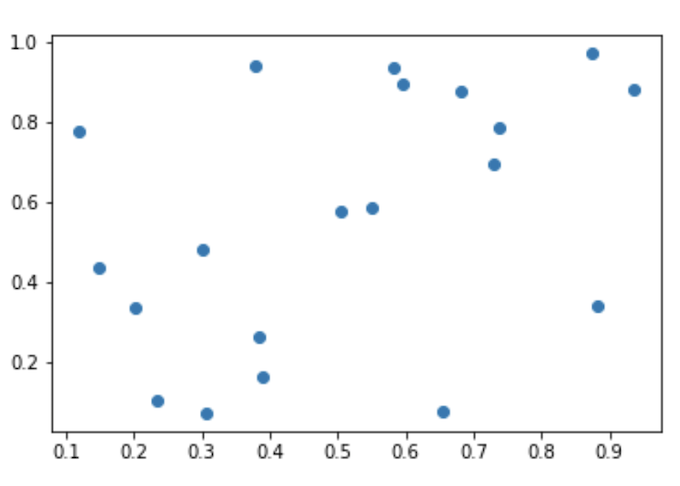

In [4]:
def nuage(X : list , Y : list , n : int ) -> list[(tuple)]:
    P = [0]*n
    for i in range (n) :
        P[i] = creer_pts(X[i], Y[i])
    return P

In [5]:
X = [1,9,6]
Y = [5,3,14]
v = nuage(X,Y,3)
print(v)

[(1, 5), (9, 3), (6, 14)]


### `un_nuage_random()`

Compléter ce module de façon à pouvoir générer aléatoirement un nuage de
points de taille arbitraire et contenu dans le carré
$[0,1] \times [0,1]$.

In [6]:
def un_nuage_random( n : int) -> list[(tuple)]:
    X = [0]*n
    Y = [0]*n
    P = [0]*n
    
    for i in range (n) : 
        X[i] = random.random()
    
    for i in range (n) :
        Y[i] = random.random()
    
    for i in range (n):
        P[i] = creer_pts(X[i],Y[i])
    
    return P

##### 

### `trier_nuage()`

Compléter ce module de façon à pouvoir trier les points d'un nuage donné selon l'ordre croissant défini sur les points du plan.

In [7]:
def trier_nuage(X:list, Y:list, n: int) -> list[(tuple)]:
    P = [0]*n
    
    for i in range (0,n) :
        P[i] = creer_pts(X[i], Y[i])
    
    P.sort()
    return P
    

In [8]:
X = [5,-25.9,12,-6.64]
Y = [2.01,4,14.6,5.7]
trier_nuage(X,Y,4)

[(-25.9, 4), (-6.64, 5.7), (5, 2.01), (12, 14.6)]

`write_nuage()`

Compléter ce module de façon à pouvoir enregistrer un nuage de points de taille arbitraire dans un fichier de texte. La taille du nuage sera aussi enregistrée dans ce fichier.  
Les fichiers `data_nuage_10.txt` et `data_nuage_100.txt` fournis dans l'archive `3-data-nuage.zip` sont des exemples de tels fichiers.

In [9]:
def write_nuage10(X : list, Y : list ,n : int) -> str:
        n = 10
        P = [0 for i in range(10)]
        for i in range (0,10) :
            P[i] = creer_pts(X[i],Y[i])
        
        with open("./3-data-nuage.zip/data_nuage_10.txt", "w", encoding="utf8") as f:
            f.write( str(10) + '\n' )
        
            for i in range(0,10):
                f.write( str(P[i]) + '\n' )
                f.write(str(float(10))  + '\n' )


In [10]:
def write_nuage100(X : list, Y : list ,n : int) -> str:
        n = 100
        P = [0 for i in range(0,100)]
        for i in range (0,100) :
            P[i] = creer_pts(X[i],Y[i])
        
        with open("./3-data-nuage.zip/data_nuage_100.txt", "w", encoding="utf8") as f:
            f.write( str(100) + '\n' )
        
            for i in range(0,100):
                f.write( str(P[i]) + '\n' )
                f.write(str(float(100))  + '\n' )

### `read_nuage()`

Compléter ce module de façon à pouvoir lire un nuage de points de taille arbitraire à partir d'un fichier de texte selon le format défini ci-dessus.

In [11]:
def read_nuage10(str) :
    f = open("/3-data-nuage.zip/data_nuage_10.txt", "r", encoding="utf8")
    
    c = f.readline()[:-1] 
    m = f.readline()[:-1]
    f.close()
    

In [12]:
def read_nuage100(str) :
    f = open("/3-data-nuage.zip/data_nuage_100.txt", "r", encoding="utf8")
    
    c = f.readline()[:-1] 
    m = f.readline()[:-1]
    f.close()

### `aff_nuage()`

Compléter ce module de façon à pouvoir tracer graphiquement un nuage de
points donné. Le tracé sera effectué à l'écran par défaut. Il permettra
aussi de stocker ce tracé dans un fichier `jpeg`.

In [13]:
def aff_nuage (X : list, Y : list , n : int) :
    P = [0]*n
    
    for i in range (n) :
        P[i] = creer_pts(X[i], Y[i])
    plt.scater(X,Y)
    plt.xlabel('Valeur de X')
    plt.ylabel('Valeur de Y')
    plt.title('Nuage de points')
    plt.savefig('Nuage_de_pts.jpeg')

## Orientation de 3 points du plan

On va développer progressivement un module `geometrie2d`.

On commence avec la détermination de l'orientation d'un triplet de points.

![Orientations d'un triplet (p,q,r)](./fig/orientation_pqr.png)

Un triplet `(p,q,r)` de points *non alignés* du plan est *orienté
positivement* si l'angle des vecteurs `(pq, pr)` est dans $]0, \pi \ [$
(modulo $2\pi$). Sinon, il est *orienté négativement*.

On vérifie l'orientation du triplet `(p,q,r)` en calculant le signe du
déterminant 2x2 $det(pq,pr)$ des vecteurs `pq` et `pr`. Signe du
déterminant et sens d'orientation coïncident.

On rappelle que :
$$det(pq,pr) = (x_q - x_p)\times(y_r - y_p) - (y_q - y_p)\times(x_r -
x_p).$$
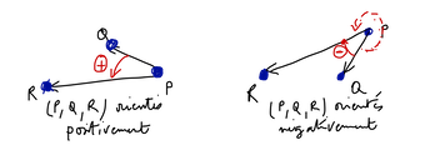

### `orientation()`

Commencer le module `geometrie2d` avec une fonction qui calcule l'orientation d'un triplet de points du plan.

In [14]:
def orientation(p,q,r:tuple[float])->float:
    det=((q[0] - p[0])*(r[1]-p[1]))-((q[1]-p[1])*(r[0]-p[0]))
    if det<0:
        print("orienté negativement")
    else:
        print("orienté positivement")
    return det


In [15]:
p=(1,2)
q=(5,9)
r=(42,13)
print(orientation(p,q,r))
      

orienté negativement
-243


## `geometrie2d`: enveloppe convexe

Un ensemble $C$ est *convexe* si le segment \[p,q\] qui relie deux
points quelconques de $C$ est inclus dans $C$.

![exemple d'ensembles convexes et non
convexe](./fig/convexes.png)

L'*enveloppe convexe* $Conv(N)$ d'un nuage de points $N$ est le plus
petit polygone convexe qui contient tous les points de $N$.

![L'enveloppe convexe du nuage de points
‘data_nuage_10.txt'](./fig/env_conv10.png) ![L'enveloppe
convexe du nuage de points
‘data_nuage_100.txt'](./fig/env_conv100.png)
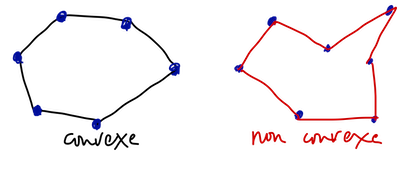
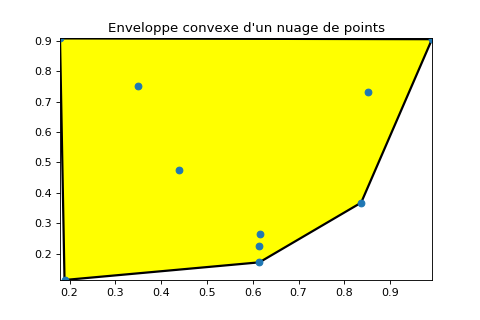
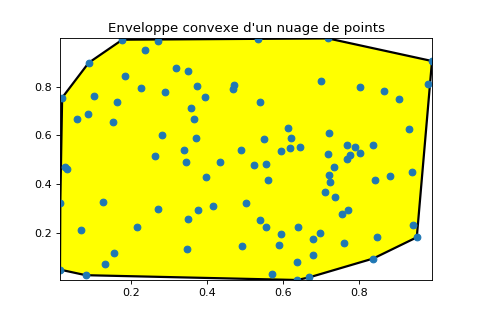

### Construire l'enveloppe convexe d'un nuage de points 

Il existe plusieurs algorithmes. 
Nous utiliserons l'algorithme de Graham-Andrew qui s'appuie sur un balayage du nuage de points préalablement triés. 

**Hypothèse importante : aucun triplet de points alignés**

Dans un premier temps, il est plus facile de supposer qu'aucun triplet $(p, q, r)$ du nuage de points ne sont alignés.

On choisira d'arrêter le traitement d'un éventuel nuage qui ne vérifie pas cette hypothèse.

**Algorithme de Graham-Andrew.**

On construit $Conv(N)$ en balayant de gauche à droite avec une droite verticale le
nuage $N$ préalablement trié par ordre croissant. 
On convient ainsi que p0 est le plus petit point de N, *ie.* celui le plus à gauche.

Chaque point p rencontré par la droite met à jour l'enveloppe convexe du sous-nuage à gauche du point p.  
Cette mise à jour s'effectue en distinguant une partie supérieure et une partie inférieure de l'enveloppe convexe.

L'*enveloppe supérieure* est au dessus du segment \[p0, p\]. 
Cette enveloppe `ES` est modifiée par l'algorithme suivant qui justifie de stocker `ES` comme une pile de base p0. On ajoute aussi à `ES`, p1 le point immédiatement supérieur à p0 (*ie.* immédiatement à droite de p0).
La pile `ES` est ainsi composée d'au moins deux éléments.

Soit p le point rencontré par le balayage de N. 
Notons q et r les deux derniers points ajoutés à `ES` -- q est au sommet.

-   Si le triplet (p,q,r) est orienté positivement alors p est ajouté à
    `ES`. Ce qui termine la mise à jour de `ES`.
-   Sinon q est retiré de `ES` et on reprend le test d'orientation et le
    traitement précédent pour **un nouveau triplet (p,q,r)** jusqu'à
    terminer la mise à jour de `ES` :
    -   par l'ajout de p à `ES`  
    -   ou parce qu'il ne reste que p0 dans `ES`. Dans ce cas, on
        termine en ajoutant p à `ES` – qui est ainsi toujours composée
        d'au moins deux éléments.

`ES` contient l'enveloppe convexe supérieure du nuage N une fois tous
les points p de N balayés.

On convient aisément que le point le plus à droite de N est le dernier
point ajouté à `ES`.

**Illustration graphique.**

`ES` = {0,1,5,6}, début du traitement de p = 7

![Orientation (7,6,5) négative](./fig/ES-1.png)

`ES` = {0,1,5}, p = 7

![Orientation (7,5,1) négative](./fig/ES-2.png)

`ES` = {0,1}, p = 7

![Orientation (7,1,0) positive](./fig/ES-3.png)

`ES` = {0,1,7}, fin du traitement de p = 7.
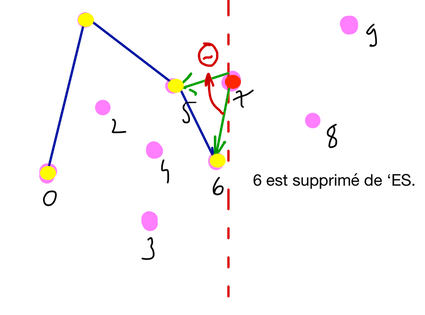
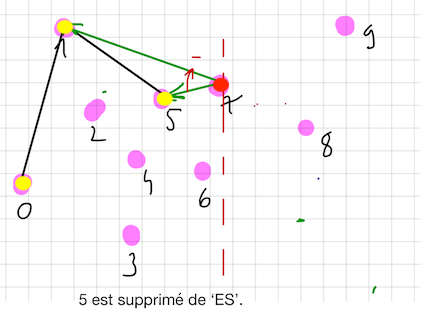
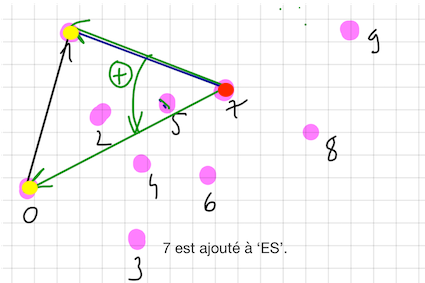

### `maj_es()` : enveloppe convexe supérieure

Compléter le module précédent avec une fonction `majES(pile, point)` qui
effectue la mise à jour de la pile `ES` lors du traitement du point p. 

In [16]:
def majES(pile : list[(tuple)],p : tuple,n : int):
    assert len(pile) == n
    pile = trier_nuage()
    for i in range(n):
        while len(pile)>=2 and orientation (p, pile[n-i-1], pile[n-i-2])<=0 :
            pile.pop()
        pile.append(p)
    return majES

### `maj_ei()`: enveloppe convexe inférieure 

L'*enveloppe convexe inférieure* est obtenue de façon similaire avec une
(autre) pile ‘EI' et un test d'orientation inverse.

Compléter le module précédent avec une fonction `majEI(pile, point)` qui
effectue la mise à jour de la pile ‘EI' lors du traitement du point p. 

In [17]:
def majEI(pile : list[(tuple)],p : tuple,n : int):
    assert n == len(pile)
    pile = trier_nuage()
    for i in range(n) :
        while orientation (pile[i+1], pile[i], p)<=0:
            pile.pop()
        pile.append(p)
    return pile

### Validation

Valider les deux fonctions précédentes sur des nuages de 5 ou 6 points.

In [18]:
pile =[(1,3),(0,33),(-3,-1.7),(11.8,22),(10,7.7)]
v = majES(pile ,(11,15),8)

AssertionError: 

### `env_convexe()`

L'enveloppe convexe $Conv(N)$ est une (autre) pile construite à partir
de `ES` et `EI` en stockant successivement chaque point visité par les 2
parcours suivants :  
- L'enveloppe convexe supérieure est parcourue de la gauche vers la
droite,  
- l'enveloppe convexe inférieure est parcourue de la droite vers la
gauche;  
et modifié comme suit :  
- l'extrémité droite de l'une et de l'autre de ces enveloppes n'est pas
répétée,  
- le sommet de $Conv(N)$ répète sa base p0.

Compléter le module précédent avec une fonction `env_convexe(nuage)` qui
construit l'enveloppe convexe d'un nuage de points arbitraire.

In [19]:
def env_convexe(nuage):
    Conv = [0]*n
    t = majEI(pile,p,n)
    Conv.append(t)
    v = majES(pile,p,n)
    Conv.append(v)
    return Conv

### `print_env()`

Compléter le module précédent avec une fonction qui permet d'afficher l'enveloppe convexe ainsi construite.

In [20]:
def print_env():
    Env = env_convexe(nuage)
    return Env
    

### `aff_nuage_env()`

Compléter le module précédent avec une fonction qui permet de tracer graphiquement cette enveloppe convexe, d'abord sans le nuage de points associé, puis avec.

In [21]:
def aff_nuage_env(pile):
    X = [0]*n
    X.append(pile[Env[0]][1])
    Y = [0]*n
    Y.append(pile[Env[0]][1])
    plt.scater(X,Y)
    plt.xlabel('Valeur de X')
    plt.ylabel('Valeur de Y')
    plt.title('Enveloppe convexe')


### Application à `n10`

On note `n10` le nuage de points définis par le fichier de données 
`data_nuage_10.txt`

Déterminer et tracer l'enveloppe convexe de ce nuage de points.

In [22]:
def aff_nuage_env10(pile):
    X = [pile[i][0] for i in range(0,10)]
    X.append(pile[Env[0]][0])
    Y = [pile[i][1] for i in range(0,10)]
    Y.append(pile[Env[0]][1])
    plt.scater(X,Y)
    plt.xlabel('Valeur de X')
    plt.ylabel('Valeur de Y')
    plt.title('Enveloppe convexe')
    

### Application à `n100`

On note `n10` le nuage de points définis par le fichier de données 
`data_nuage_100.txt`

Déterminer et tracer l'enveloppe convexe de ce nuage de points.

In [23]:
def aff_nuage_env(pile):
    X = [0]*100
    X.append(pile[Env[0]][0])
    Y = [0]*100
    Y.append(pile[Env[0]][1])
    plt.scater(X,Y)
    plt.xlabel('Valeur de X')
    plt.ylabel('Valeur de Y')
    plt.title('Enveloppe convexe')
    